
# Project: Investigate a Dataset ( Patients No/show appointments - Brazil, May 2016  ) 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

### Question(s) for Analysis

● by our analysis we wil try to understand What factors are important for us
to know in order to predict if a patient will showup for their scheduled appointment ?

● what the correlation between the possibility of patient's showing up and each of characteristic related to patients dataset ?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd 
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

*  firstly we put the  main question we want to answer through our analysis 
   then , In this section of the report, we want to wrangle the dataset by assessing then trim and clean the dataset  

### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Assessing dataset :

 Now as wrangling process step we will explore the dataset to know some necessary information about it which help us in our analysis and make cleaning after that to items in case we need that :
 1/ check for the dataset shape.
 2/ check for duplicated rows 
 3/check dor missing values 
 4/ check for nun-null unique values 


In [4]:
# explore the dimensions of dataset 
df.shape

(110527, 14)

dataset contains number of 110527 rows and 14 columns .

In [5]:
df.duplicated().sum()

0

there is no duplicated rows 

let's put more speceific question , are all of those patients unique or some of them have more than one appointment , we can check for that by using patient-id  colume

In [6]:
# check for patients unique value :
df['PatientId'].nunique()

62299

that's menaning  is 62299 out of total patients are unique values .

In [7]:
# so on we can get number of duplicated patients-ID :
df['PatientId'].duplicated().sum()

48228

In [8]:
#check for the missing values : 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


we found  all the columns has the same number ( full number ) , so we can say there is no missing values

In [8]:
# we want to get some insigts about our dataset :
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we found mean age is 37 years 
the  greater age (MAX) is 115 years , the minmum age is -1 which is not make sense so probably its a mistake we want to handle it in the step of cleaning process.  
-also the 50 %  precentages of patients age is between 18 and 55 years .
-the most of patients doesn't have diabetes or hipertenstion .
-the most of patients doesn't receive SMS .
-the most of patients doesn't receive SMS .
-the most of patients are not disabled.


In [10]:
# we found a typo mistake in colume named (Hipertension) we want to change it in cleaning step .


### Data Cleaning
NOW we will make  some necessary editions to handle the dataset to be ready to make our analysis :

1 / correcting spelling of '  Hipertension ' columne 

2 / drop ( age = - 1 ) value as its not make sense .

3 / drob uncosistent rows ( we are not in need to it  in our analysis ) 

4/ rename the colume of 'No-show ' to no_show to help us in analysis
 

In [9]:
# correcting the "Hipertension" colume :
df.rename(columns={'Hipertension' : 'Hypertension'} , inplace=True)
#check the data after editions :
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
#drop uncosistent rows ( we are not in need to it in our analysis )
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
#check the effect on dataset :
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# we will delete the row of (-1) value :
values =[-1]
df = df[df.Age.isin(values) == False]


In [12]:
# let's check the effect on data : 
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


so we drop the row which is mistaked inserted 


In [13]:
# renaming the "No-show" colume :
df.rename(columns={'No-show' : 'no_show'} , inplace=True)
#check the data after editions :
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Summary of Wrangling process : 
    
 we follow the process of Data analysis begins with making brainstorm to get a questions which we want to ask about it through our analysis

then start the wrangling step: as 
   - we gathering data from CSV file and showed up the first five rows to know the consist of dataset .
    
   - Assessing the Data by explore the dataset by knowing the dimensions of it , then check for any duplicates , missing values , check for unique values
    then show some features of dataset like mean , min , max .
    
   - cleaning the data by correcting wrong spelling ( renaming)  and drop unnecessary columns .
    

<a id='eda'></a>
## Exploratory Data Analysis

 Now  , we  already trimmed and cleaned our data, we're ready to move on to  step ( 3 ) exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that we posed in the Introduction section. 

### General view  : 

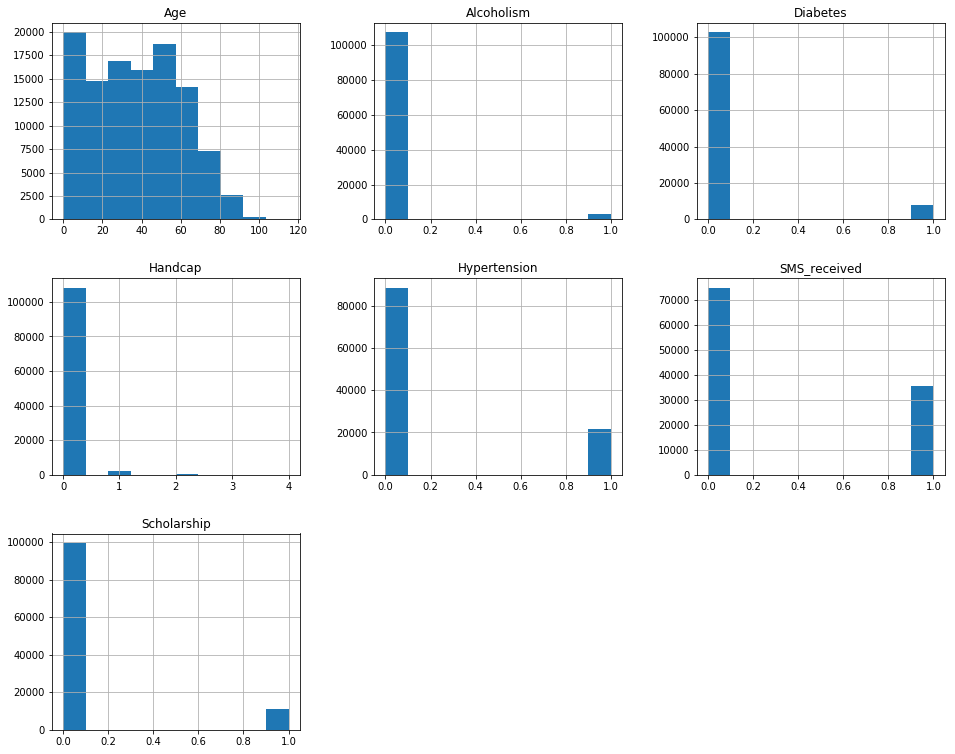

In [14]:
# let's make an overview on our data by histogram of whole dataset :
df.hist(figsize=(16,13));

from the last inspection we can found some observations :
    
    1/most of patients didn't suffer from hypertension , diabetes nor handicapped .
    
    2/ most of patients not alcohol addicted .
    
    3/near to 20.000 out of approximately 110.000 patients suffering from hypertension
    
    4/ numbers of patients who received SMS is about half of patients who did not receive SMS .
    
    5/ near to 10.000 out of approximately 110.000 patients enrolled in welfare program

In [15]:
# to make the analysis more easier we will re-group the patients into two groups by assign them into two variables show/noshow
show=df.no_show=='No'
noshow=df.no_show=='Yes'

In [16]:
#let's count the each members of two groups :
df[show].count()

Gender           88207
Age              88207
Neighbourhood    88207
Scholarship      88207
Hypertension     88207
Diabetes         88207
Alcoholism       88207
Handcap          88207
SMS_received     88207
no_show          88207
dtype: int64

In [17]:
# count of now-show : 
df[noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
no_show          22319
dtype: int64

we can say the number of patients who showed-up at the appoint ment is 88207  

, the number of who not showed-up is 22319  

it's appear that patients who showed was 4 times in compare with who did not show . 

# Analyzing the other characteristics :

in the next section we will make more inspection to find out the relation between  patients ' showing or not showing  according to some characteristics like ( gender , age , disease , alcohol addictive , sms received , neighborhood)


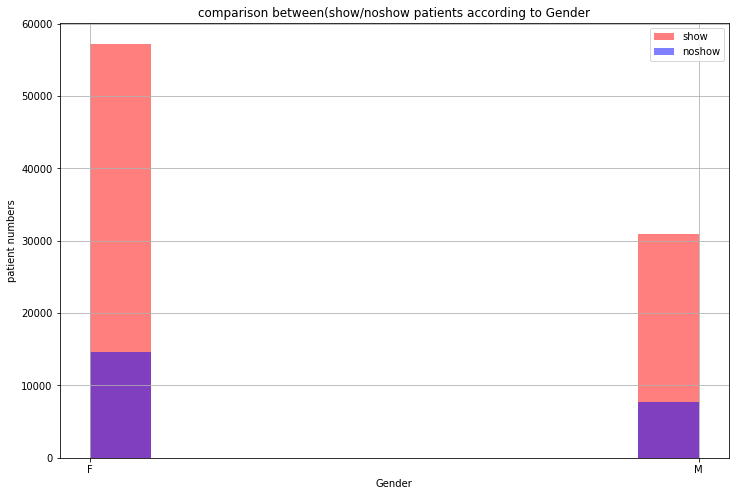

In [18]:
# compare the patients who showed-up /and who don't  according to gender : 
def attend(df,col_name,attended,absent):
    df[col_name][show].hist(alpha=0.5,label='show', color='red',figsize=[12,8])
    df[col_name][noshow].hist(alpha=0.5,label='noshow', color='blue',figsize=[12,8])

    # to make the plot more descreptive we will use 'legend'  function to describe the elements of the plot : 
    plt.legend();
    
    # assign the labels name and title to make the plot more comprehension :
    plt.title('comparison between(show/noshow patients according to {}'.format(col_name))
    plt.xlabel(col_name)
    plt.ylabel('patient numbers');
    plt.show()

attend(df,'Gender',show,noshow)

from the last graph we can say there is no clear relationship  between (showing or not showing the patients) and the gender 
cause the precentage is approximtely the same .

In [19]:
#let's translate the same result into numbers : 

#no of showed patients : 
print(df.Gender[show].value_counts())

#no of un-showed patients :
print(df.Gender[noshow].value_counts())

F    57245
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


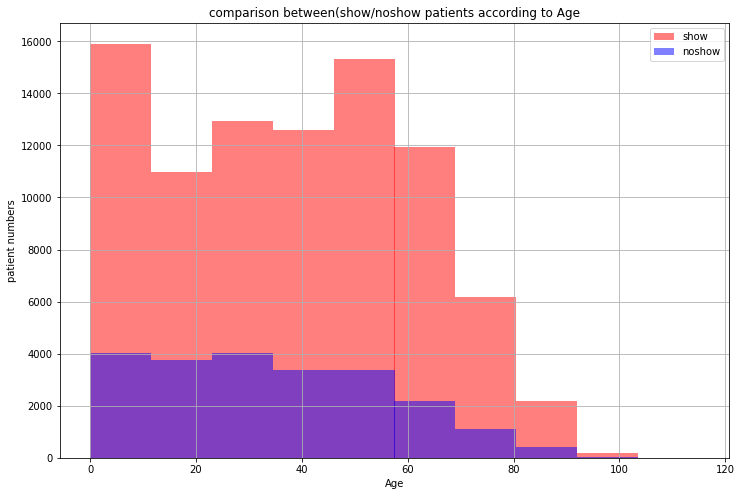

In [20]:
# compare the patients who showed-up /and who don't  according to Age :
attend(df,'Age',show,noshow)

from the last graph we can see that the most patients are showed in clinic the mean age of them is between 0 - 10 , I think thats because they are still children so they take more  family care .

in the next level we can see the mean age for who showing is between 35 to 70 .

its clear that the patients greater than 70 years old is not showed and the precentage of showing  in clinic goes to be very less for them   

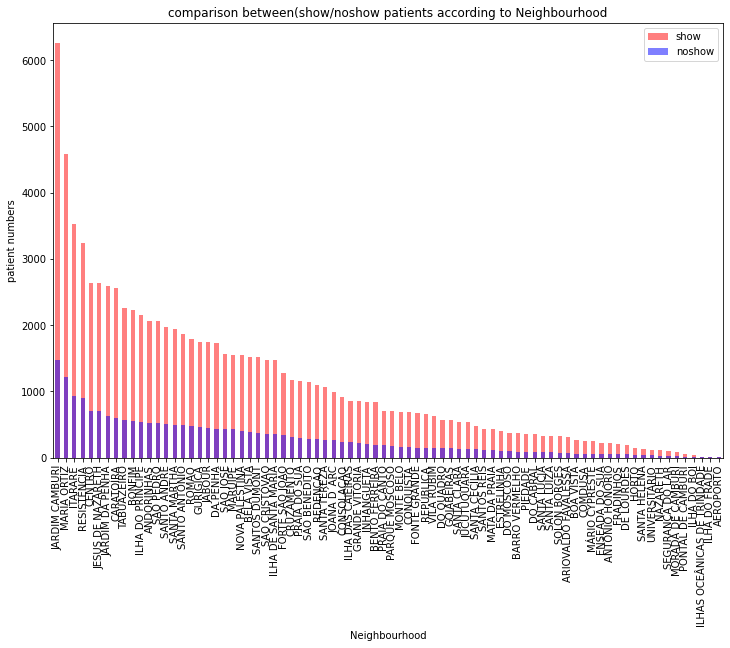

In [23]:
# compare the patients who showed-up /and who don't  according to nehibourhood :
# we will visualize this correlation as a Bar :
df.Neighbourhood[show].value_counts().plot(kind='bar',alpha=0.5,label='show', color='red',figsize=[12,8])
df.Neighbourhood[noshow].value_counts().plot(kind='bar',alpha=0.5,label='noshow', color='blue',figsize=[12,8])

# to make the plot more descreptive we will use 'legend' function to describe the elements of the plot : 
plt.legend()
# assign the labels name and title to make the plot more comprehension :

plt.title('comparison between(show/noshow patients according to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('patient numbers');

from the last graph we can see the Neighbourhood is has a direct effect for showing or no showing patients in clinic

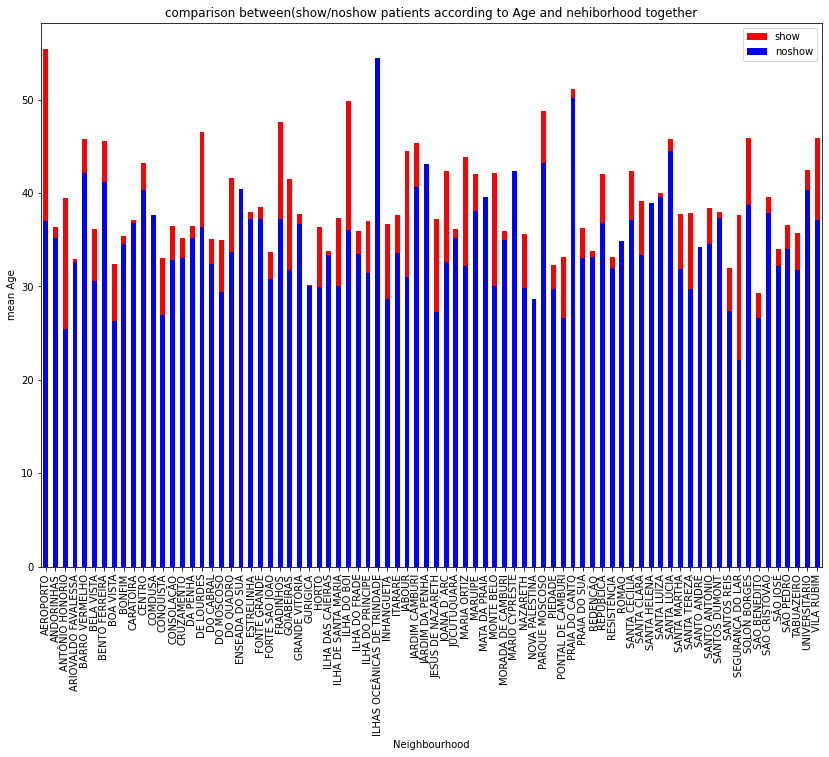

In [24]:
# compare the patients who showed-up /and who not attend with the Age and nehiborhood together :  :

df[show].groupby(['Neighbourhood']).mean()['Age'].plot(kind='bar',label='show', color='red',figsize=[14,10])
df[noshow].groupby(['Neighbourhood']).mean()['Age'].plot(kind='bar',label='noshow', color='blue',figsize=[14,10])
# to make the plot more descreptive we will use 'legend'  function to describe the elements of the plot : 
plt.legend();
# assign the labels name and title to make the plot more comprehension :

plt.title('comparison between(show/noshow patients according to Age and nehiborhood together')
plt.xlabel('Neighbourhood')
plt.ylabel('mean Age');

In [25]:
df[show].groupby(['Neighbourhood']).mean()['Age'],df[noshow].groupby(['Neighbourhood']).mean()['Age']

(Neighbourhood
 AEROPORTO              55.428571
 ANDORINHAS             36.375072
 ANTÔNIO HONÓRIO        39.425339
 ARIOVALDO FAVALESSA    32.918182
 BARRO VERMELHO         45.828313
                          ...    
 SÃO JOSÉ               34.004519
 SÃO PEDRO              36.579410
 TABUAZEIRO             35.686206
 UNIVERSITÁRIO          42.508333
 VILA RUBIM             45.874648
 Name: Age, Length: 80, dtype: float64,
 Neighbourhood
 AEROPORTO              37.000000
 ANDORINHAS             35.207294
 ANTÔNIO HONÓRIO        25.440000
 ARIOVALDO FAVALESSA    32.596774
 BARRO VERMELHO         42.164835
                          ...    
 SÃO JOSÉ               32.198598
 SÃO PEDRO              34.009709
 TABUAZEIRO             31.746946
 UNIVERSITÁRIO          40.281250
 VILA RUBIM             37.056738
 Name: Age, Length: 80, dtype: float64)

from the last graph we found that the mean ages fro who attend or not is very near from nehiborhood to another ( just little different ) ,
so we can say there is no clear correlation between mean age,nehiborhood and attendance of patients .
although the nehiborhood it self has an efficent on possibility of attendance .

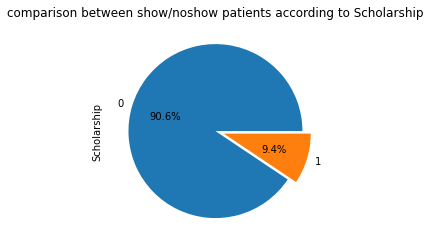

In [26]:
# compare the patients who showed-up /and who don't  according to Scholarship :
# visualize the patients who enrolled in welfare system :
df_vc_pie = df.Scholarship[show].value_counts(normalize=True)
df_vc_pie.plot.pie(y='show', 
                   autopct='%1.1f%%', explode=(0, 0.1))

# assign the labels name and title to make the plot more comprehension :
plt.title('comparison between show/noshow patients according to Scholarship');

Text(0.5, 1.0, 'comparison between show/noshow patients according to Scholarship')

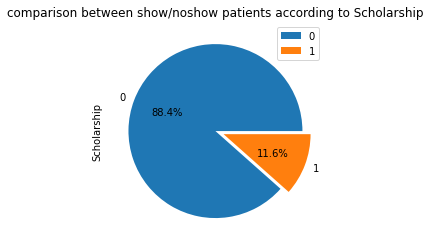

In [27]:
# compare the patients who showed-up /and who don't  according to Scholarship :
# visualize the patients who not-enrolled in welfare system :

df_vc_pie = df.Scholarship[noshow].value_counts(normalize=True)
df_vc_pie.plot.pie(y='show', 
                   autopct='%1.1f%%', explode=(0, 0.1))
# to make the plot more descreptive we will use 'legend  ' function  to describe the elements of the plot : 
plt.legend()
# assign the labels name and title to make the plot more comprehension :

plt.title('comparison between show/noshow patients according to Scholarship')

In [28]:
#let's translate the same result into numbers : 

#no of showed patients : 
print(df.Scholarship[show].value_counts())

#no of un-showed patients :
print(df.Scholarship[noshow].value_counts())

0    79924
1     8283
Name: Scholarship, dtype: int64
0    19741
1     2578
Name: Scholarship, dtype: int64


from the last graph we can see the Scholarship is not has direct correlation for showing or no showing patients in clinic .

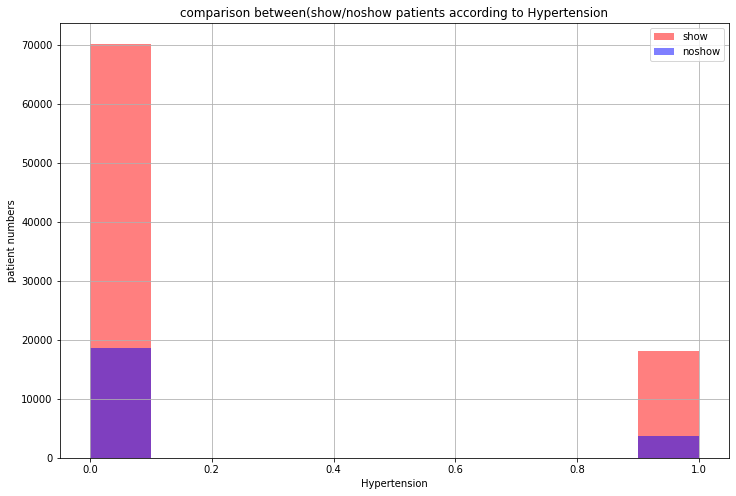

In [29]:
# compare the patients who showed-up /and who don't  according to hypertenstion : 
attend(df,'Hypertension',show,noshow)

from the last graph we can say the number of patients who suffering from hypertension is not has direct correlation for showing or no showing patients in clinic .

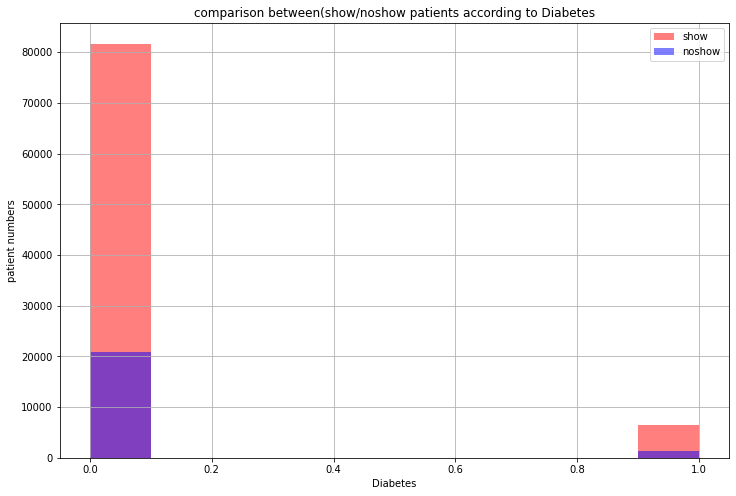

In [30]:
# compare the patients who showed-up /and who don't  according to diabetes : 
attend(df,'Diabetes',show,noshow)

from the last graph we can say the number of patients who suffering from Diabetes is not has direct correlation for showing or no showing patients in clinic .

Text(0,0.5,'mean Age')

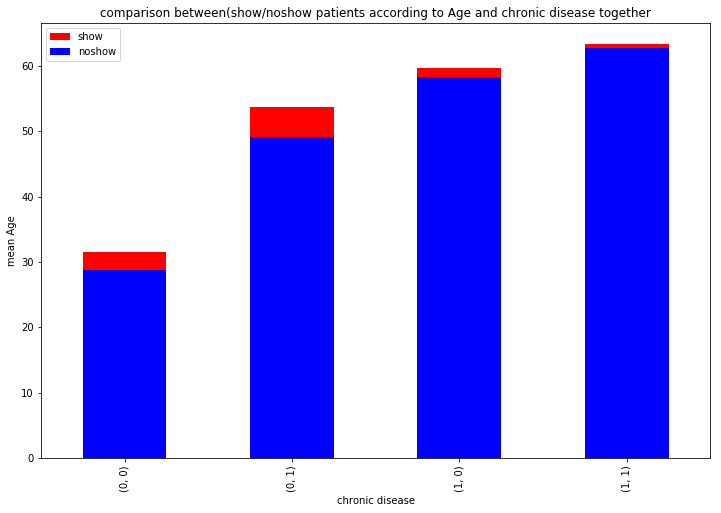

In [21]:
# compare the patients who showed-up /and who the Age and chronic disease together :  :
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',label='show', color='red',figsize=[12,8])
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',label='noshow', color='blue',figsize=[12,8])

# to make the plot more descreptive we will use 'legend'  function to describe the elements of the plot : 
plt.legend();

# assign the labels name and title to make the plot more comprehension :
plt.title('comparison between(show/noshow patients according to Age and chronic disease together')
plt.xlabel('chronic disease')
plt.ylabel('mean Age')

from the last graph  we can say there is no clear correlation beween attendace and chronic disease , but let us get more inspection :

In [32]:
#let's translate the last graph  in numbers :
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']



(Hypertension  Diabetes
 0             0           31.510433
               1           53.666952
 1             0           59.702144
               1           63.406361
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.834155
               1           49.183391
 1             0           58.377043
               1           62.820333
 Name: Age, dtype: float64)

now , it's appear that :
for the patients who not has chronic disease , the mean age for who attend is 30 and the mean age for who not attend is 28

for the patients who suffering from chronic disease , the mean age for who attend is 63 and the mean age for who not attend is 63

so as we say befor there is no correlation beween attendace and chronic disease ,

but by the way as a side note there's a relation between the age and chronic disease as the possibility of being a patient suffering from  Hypertension or Diabetes become more with oldest patients . 


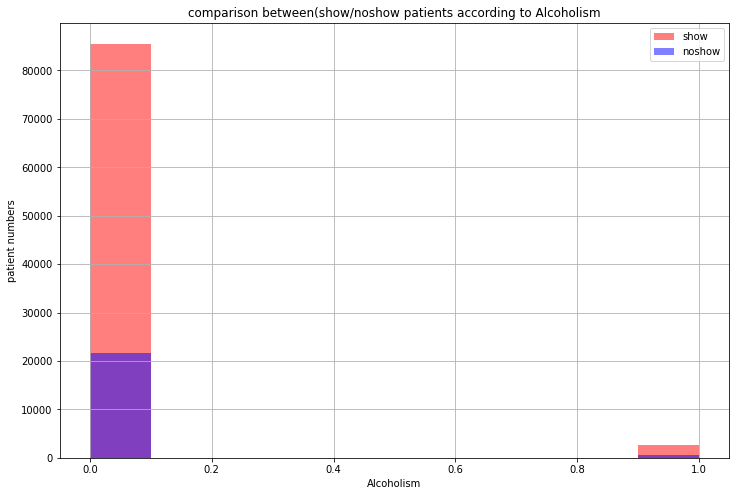

In [33]:
# compare the patients who showed-up /and who don't  according to Alcoholism : 
attend(df,'Alcoholism',show,noshow)

from the last graph it's appear the precentage is approximately near , we can say the number of patients who addictied to alcohol  is not has direct correlation for showing or no showing patients in clinic 

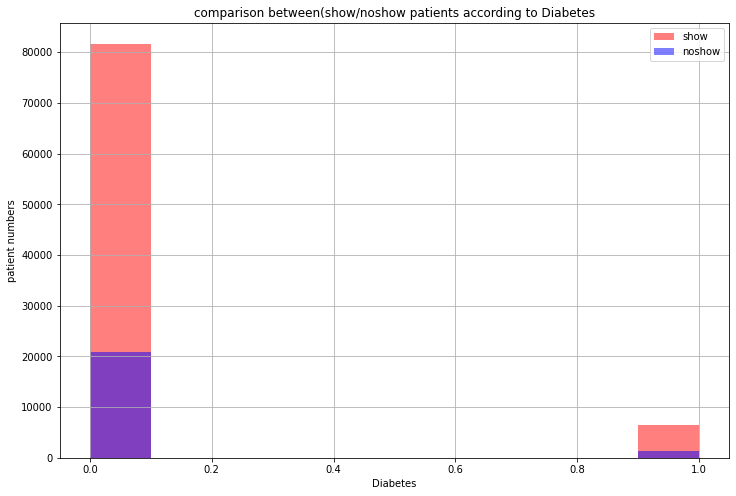

In [34]:
# compare the patients who showed-up /and who don't  according to disability : 
attend(df,'Diabetes',show,noshow)

from the last graph we can say the number of patients who suffering from disability is not has direct correlation for showing or no showing patients in clinic .

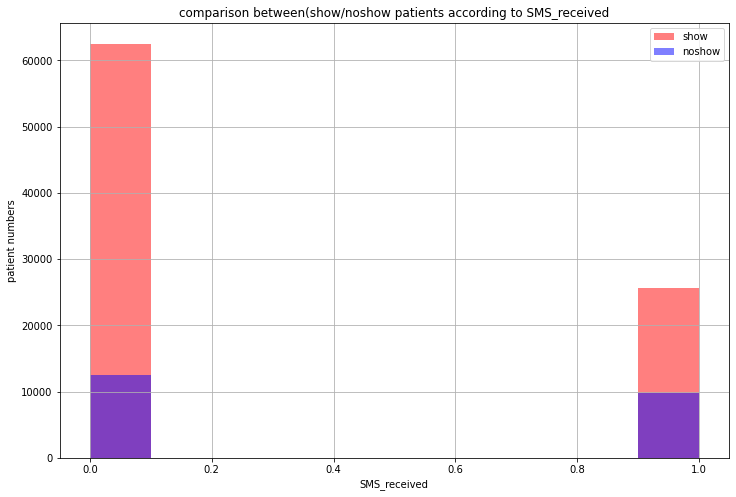

In [35]:
# compare the patients who showed-up /and who don't  according to sms-received : 
attend(df,'SMS_received',show,noshow)

from the last graph we can see the number of patients who  not received SMS is showing more than the ones who not received ! 

may be that indictes the marketing campign is not has truly efficency on the patients appearance ( its not has any effect , also it make us thinking how to improve the campign to make it more efficent . 

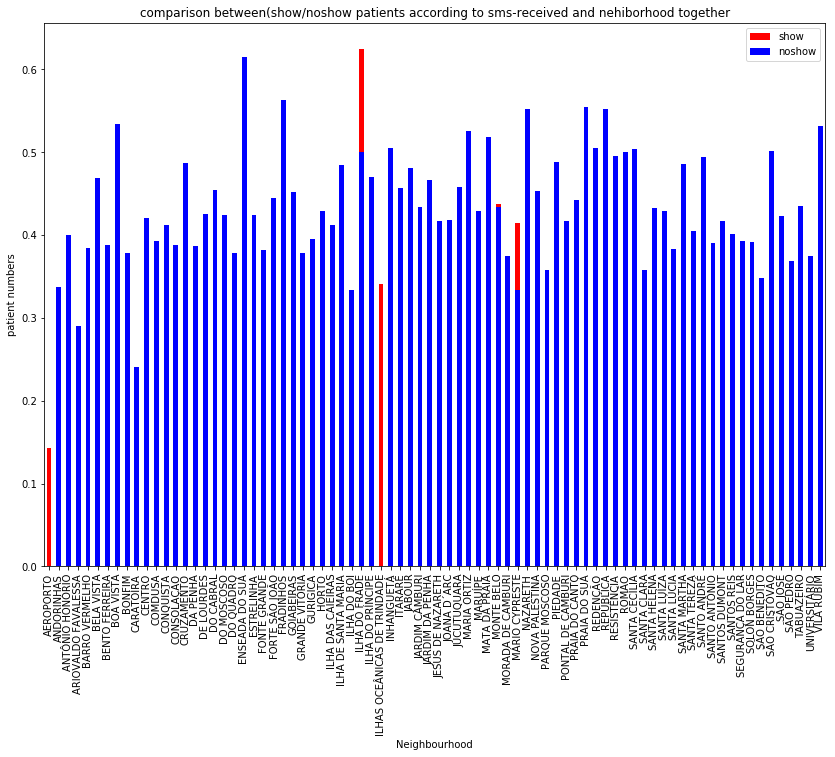

In [24]:
# compare the patients who showed-up /and who not attend with the sms-received and nehiborhood together : 
# we will visualize this correlation in different graphs :
def attend(df,col_name,attended,absent):
    df[show].groupby(['Neighbourhood']).SMS_received.mean().plot(kind='bar',label='show', color='red',figsize=[14,10])
    df[noshow].groupby(['Neighbourhood']).SMS_received.mean().plot(kind='bar',label='noshow', color='blue',figsize=[14,10])                                                           

    # to make the plot more descreptive we will use 'legend'  function to describe the elements of the plot : 
    plt.legend();
    # assign the labels name and title to make the plot more comprehension :

    plt.title('comparison between(show/noshow patients according to sms-received and nehiborhood together')
    plt.xlabel('Neighbourhood')
    plt.ylabel('patient numbers');
  
attend(df,'Neighbourhood',show,noshow)

In [23]:
#let's translate those graphs in numbers :
df[show].groupby(['Neighbourhood']).SMS_received.mean(),df[noshow].groupby(['Neighbourhood']).SMS_received.mean()

(Neighbourhood
 AEROPORTO              0.142857
 ANDORINHAS             0.224584
 ANTÔNIO HONÓRIO        0.330317
 ARIOVALDO FAVALESSA    0.177273
 BARRO VERMELHO         0.325301
 BELA VISTA             0.260670
 BENTO FERREIRA         0.372932
 BOA VISTA              0.370079
 BONFIM                 0.256860
 CARATOÍRA              0.197568
 CENTRO                 0.297986
 COMDUSA                0.342520
 CONQUISTA              0.230769
 CONSOLAÇÃO             0.221247
 CRUZAMENTO             0.331810
 DA PENHA               0.247763
 DE LOURDES             0.306202
 DO CABRAL              0.315678
 DO MOSCOSO             0.267913
 DO QUADRO              0.337094
 ENSEADA DO SUÁ         0.366120
 ESTRELINHA             0.263889
 FONTE GRANDE           0.318949
 FORTE SÃO JOÃO         0.290992
 FRADINHOS              0.361905
 GOIABEIRAS             0.371226
 GRANDE VITÓRIA         0.279859
 GURIGICA               0.211908
 HORTO                  0.285714
 ILHA DAS CAIEIRAS      0.28

from the last  three graph we found there is some nehiborhood is more responsive than other for the Sms messages , 

so on that's meaning there is a need to reconsidering how the marketing campign working from nehiborhood to another .

<a id='conclusions'></a>
## Conclusions

* the Neighbourhood has strong efficent on the precentage of patient attendance to clinic .

* Age has an efficent on attendance of patients as ages from 0to 10 showing the highest rate of showing , then in the second level which indicated to high rate atrtendance is ages from 35 to 70 

* most of patients come withough received SMS ,  may be that's indicates the the marketing campign is useless and not has any effect on patients attendance rate , so we recommend to find aways to improve the campign .

## limitations :

the limitations which we faced through our analysis that is most of charcterstics in the dataset  not having a correlation with the possibility of patients attendance 
like gender ,chronic diseas , disability , alcohol addiction .



In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0